# ResNet

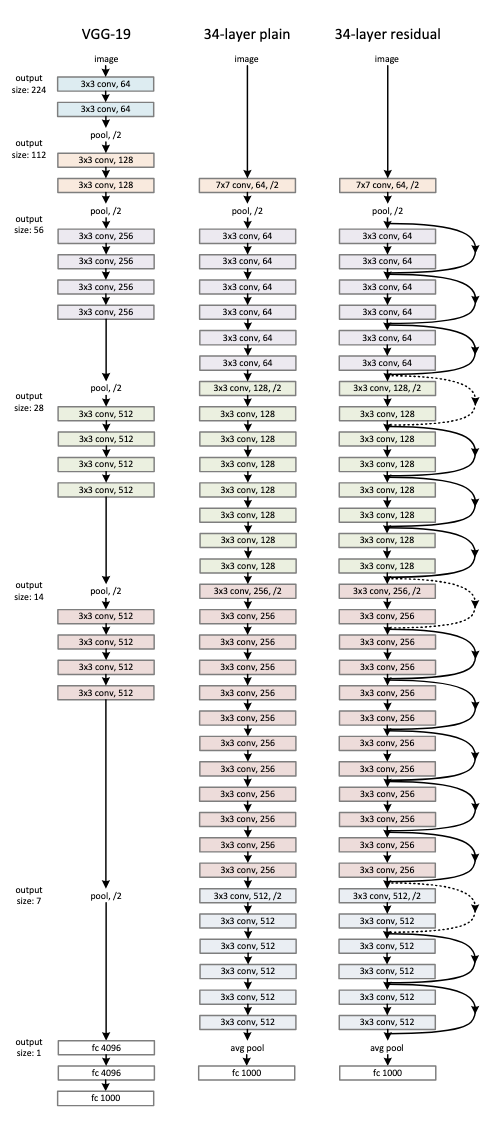

Si LeNet-5 constituye el punto de partida histórico de las redes neuronales convolucionales y VGG representa la consolidación de la profundidad como factor clave del rendimiento, **ResNet** (*Residual Network*), presentada por Kaiming He y su equipo de Microsoft Research en 2015, marca una auténtica ruptura conceptual. Esta arquitectura permitió superar de forma efectiva la barrera práctica que impedía entrenar redes extremadamente profundas y demostró que modelos con más de un centenar de capas no solo eran entrenables, sino también altamente precisos.

ResNet alcanzó una repercusión inmediata al ganar el desafío **ImageNet 2015** con una versión de **152 capas**, una profundidad que hasta ese momento se consideraba inabordable desde el punto de vista del entrenamiento estable.

## Teoría

### La Degradación del Gradiente

Antes de la introducción de ResNet, predominaba la intuición de que aumentar el número de capas conducía de forma casi automática a una mayor precisión. Sin embargo, los experimentos empíricos mostraron que, a partir de un umbral relativamente bajo —en torno a veinte o treinta capas—, el rendimiento comenzaba a deteriorarse de manera significativa.

Este fenómeno no se debía al *overfitting*, sino a un problema estructural más profundo conocido como **degradación**. En redes muy profundas, la señal de error que se propaga hacia atrás durante el proceso de entrenamiento tiende a debilitarse progresivamente. Como resultado, las capas más cercanas a la entrada reciben gradientes muy pequeños o inestables, lo que dificulta o impide el aprendizaje efectivo. En este contexto, añadir más capas no solo dejaba de ser beneficioso, sino que empeoraba la capacidad de la red para representar la función deseada.

### Conexiones Residuales

La innovación central de ResNet consiste en la introducción de las **conexiones de atajo**, también denominadas *skip connections*, que dan lugar al denominado **bloque residual**. En lugar de obligar a cada conjunto de capas a aprender directamente una transformación completa, la arquitectura permite que dichas capas aprendan únicamente la **diferencia**, o residuo, entre la entrada y la salida.

Desde un punto de vista funcional, si una capa recibe una entrada \(x\), una red convencional aprende una transformación \(F(x)\) y produce como salida \(F(x)\). En ResNet, la salida se define como \(F(x) + x\). Esta simple suma introduce una ruta alternativa por la que la información puede fluir sin modificaciones, creando una especie de “autopista” que atraviesa la red.

Este mecanismo tiene consecuencias profundas para el entrenamiento. Si una capa o bloque no resulta útil, el modelo puede aproximar el residuo a cero, permitiendo que la señal original se propague sin alteraciones. Además, durante la retropropagación, el gradiente puede atravesar estas conexiones directas sin atenuarse, lo que estabiliza el aprendizaje incluso en redes extremadamente profundas.

### Variantes Arquitectónicas y Diseño Interno

La familia ResNet incluye múltiples variantes que se diferencian principalmente por su profundidad, entre las que destacan ResNet-18, ResNet-34, ResNet-50, ResNet-101 y ResNet-152. A partir de cincuenta capas, la arquitectura adopta un diseño optimizado conocido como **bloque “bottleneck”** o cuello de botella, cuyo objetivo es reducir el coste computacional sin sacrificar capacidad representacional.

Este bloque se compone de tres convoluciones consecutivas. La primera es una convolución **1 × 1** que reduce la dimensionalidad del espacio de características, la segunda es una convolución **3 × 3** que realiza el procesamiento principal, y la tercera es otra convolución **1 × 1** que restaura la dimensionalidad original. Esta estrategia permite construir redes muy profundas manteniendo un número de parámetros relativamente contenido.

### ResNet en Perspectiva Evolutiva

La comparación entre LeNet-5, VGG-16 y ResNet-50 pone de manifiesto la evolución conceptual del aprendizaje profundo. LeNet-5, presentado en 1998, cuenta con siete capas y unos sesenta mil parámetros, y su principal innovación fue la introducción de la convolución como mecanismo para explotar la estructura espacial de las imágenes. VGG-16, en 2014, elevó la profundidad a dieciséis capas mediante una arquitectura uniforme basada en filtros **3 × 3**, pero a costa de un número muy elevado de parámetros, cercano a los ciento treinta y ocho millones. ResNet-50, introducida en 2015, alcanza cincuenta capas con tan solo unos veinticinco millones de parámetros gracias al uso sistemático de conexiones residuales, logrando una combinación notable de profundidad, estabilidad y eficiencia.

### Impacto y Vigencia Actual

En la actualidad, ResNet se considera una arquitectura de referencia tanto en el ámbito académico como en aplicaciones industriales. Su equilibrio entre profundidad, estabilidad y eficiencia la ha convertido en la base de numerosos sistemas de reconocimiento facial, conducción autónoma, diagnóstico médico asistido por imagen y análisis visual a gran escala.

Entre sus principales ventajas destaca el hecho de ser significativamente más ligera que VGG, ya que, por ejemplo, ResNet-50 utiliza aproximadamente cinco veces menos parámetros que VGG-16. Además, su diseño residual permite entrenar redes de cientos, e incluso miles, de capas sin que el rendimiento se degrade, algo impensable antes de su introducción. Por estas razones, ResNet no solo resolvió un problema técnico concreto, sino que redefinió la forma de concebir la profundidad en las redes neuronales convolucionales.


## Implementación